# Library

In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from module_KTX_KK import * 
from preprocessing_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *

JAVA is in the system path?:  False
JAVA is in the system path?:  Adding...
Operation Machine:  Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
Operation Platform:  64bit
OS Type:  Windows
OS Version:  11
Python Version:  3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[Kss]: From C:\Users\KK\anaconda3\Lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



# Descriptive Statistics

In [2]:
# 데이터로딩 및 전처리
file_name = 'df_KTX_monthmean_KCI_KK.csv'
df = pd.read_csv(os.path.join('.', 'Data', file_name)).iloc[:,1:]

In [3]:
# descriptive_KK(df, target='승차인원수')

In [3]:
df_stat = df.groupby(['주운행선', '전체주중주말'])['승차인원수'].describe()[['mean', 'std', 'max']].astype(int)
df_stat.columns = ['일평균 승차인원수 평균', '일평균 승차인원수 표준편차', '일평균 승차인원수 최대값']
display(df_stat)

일평균 승차인원수 평균  일평균 승차인원수 표준편차  일평균 승차인원수 최대값
주운행선 전체주중주말                                             
경부선  전체             81179           38327         125628
     주말             95722           46141         156824
     주중             73494           35018         134920
경전선  전체             14104            6747          24107
     주말             16678            8217          29279
     주중             12728            6058          22917
동해선  전체             11442            6029          20391
     주말             12853            6883          23417
     주중             10856            5785          20817
전라선  전체             14336            7627          27828
     주말             17148            9228          33672
     주중             12788            6885          26558
호남선  전체             23001           10499          36109
     주말             26974           12722          42793
     주중             20942            9587          36017

경부선
Numerical Scaling... ( 2025-01-10 00:01:18.687568 )


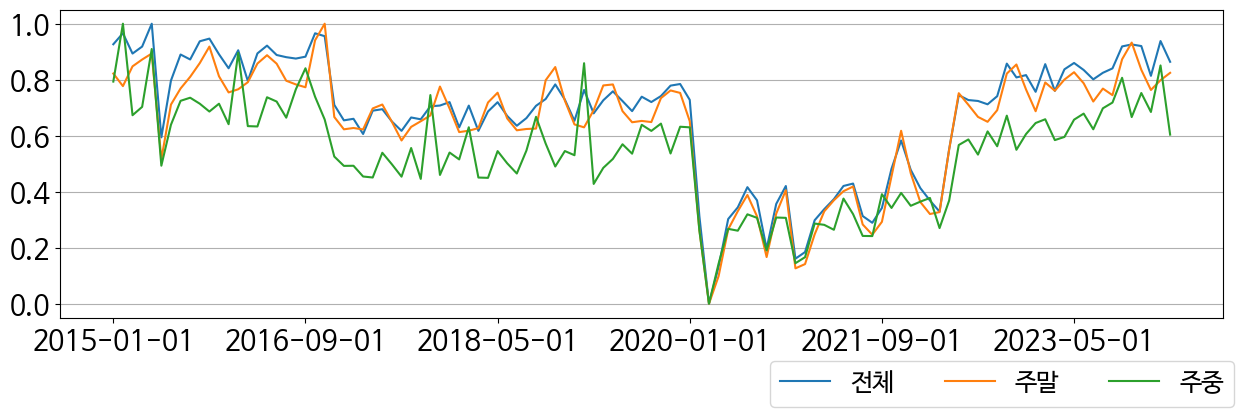

경전선
Numerical Scaling... ( 2025-01-10 00:01:18.865580 )


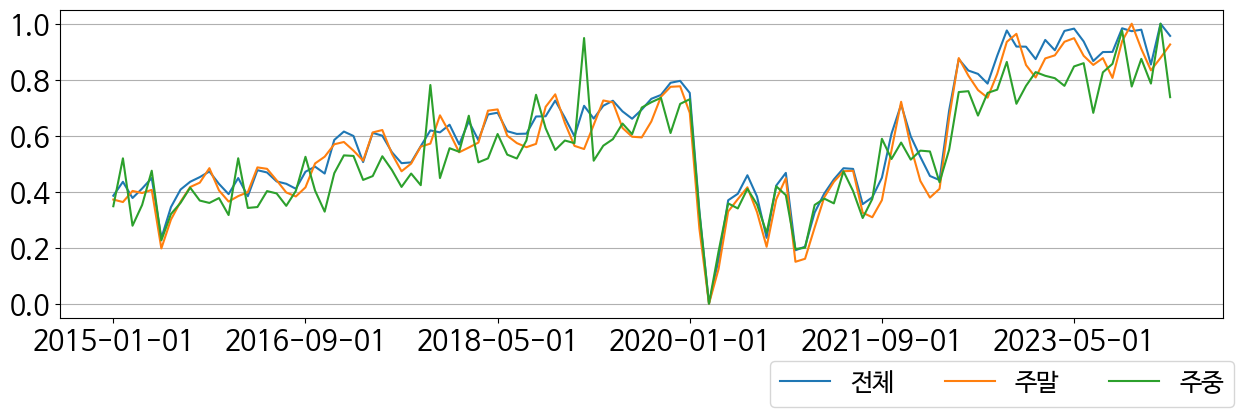

동해선
Numerical Scaling... ( 2025-01-10 00:01:19.127594 )


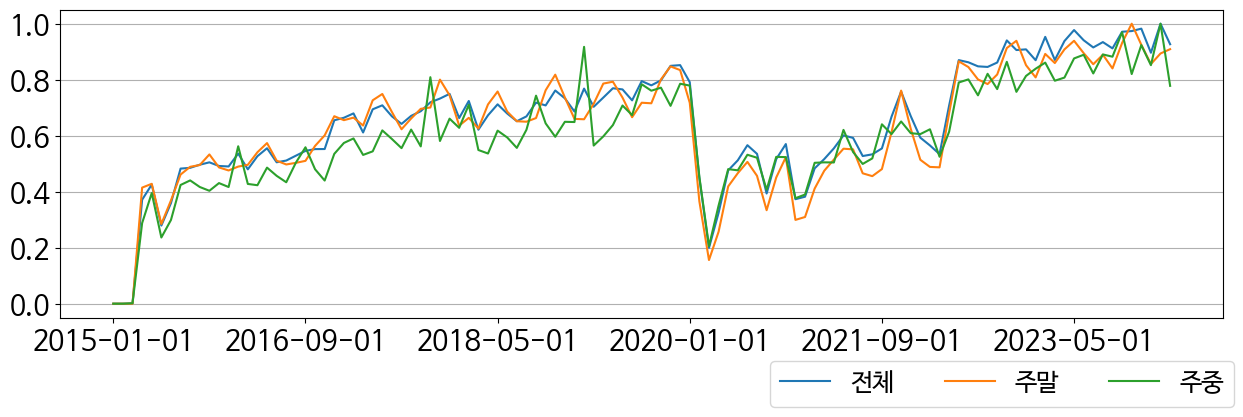

전라선
Numerical Scaling... ( 2025-01-10 00:01:19.401696 )


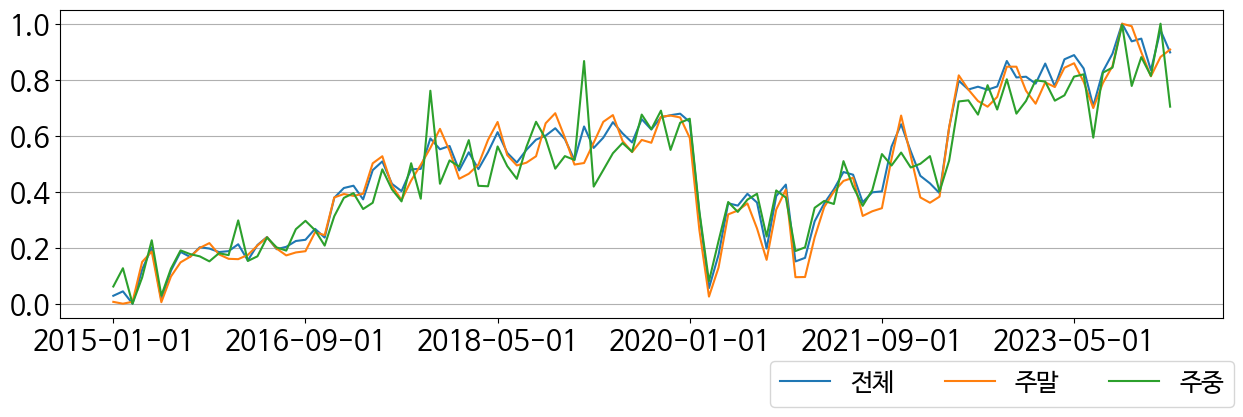

호남선
Numerical Scaling... ( 2025-01-10 00:01:19.617683 )


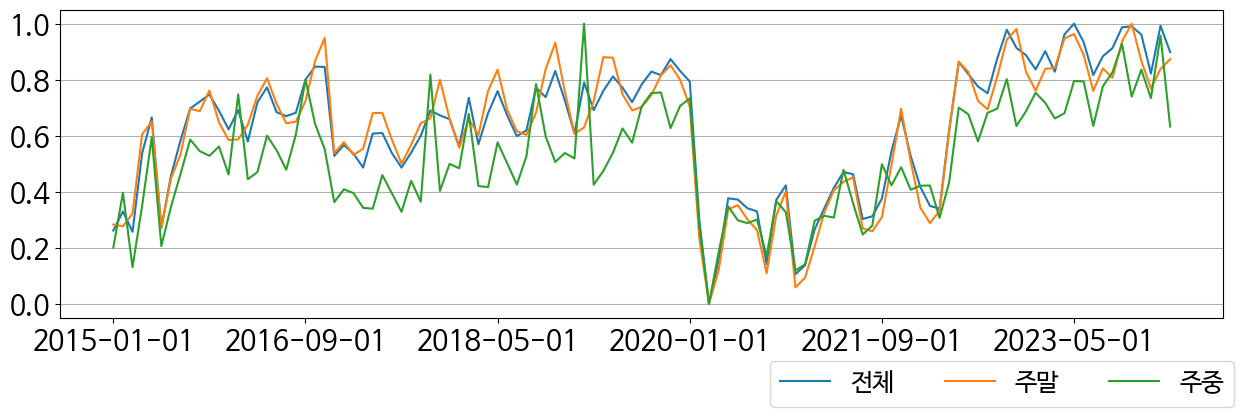

In [4]:
df_time = df.groupby(['전체주중주말', '주운행선', '운행년월'])['승차인원수'].sum().unstack(level=0).reset_index()

for period in df_time['주운행선'].unique():
    print(period)
    df_sub = df_time[df_time['주운행선'] == period]
    df_sub.set_index('운행년월', inplace=True)
    df_sub = df_sub.loc[df_sub.index <= '2024-03-01'].iloc[:,1:]
    plot_timeseries_dforigin(df_sub, scaled=True, figsize=(15,4), 
                             xlabel='', legend_colnum=5, save_local=False)

전체
Numerical Scaling... ( 2025-01-10 00:02:18.322945 )


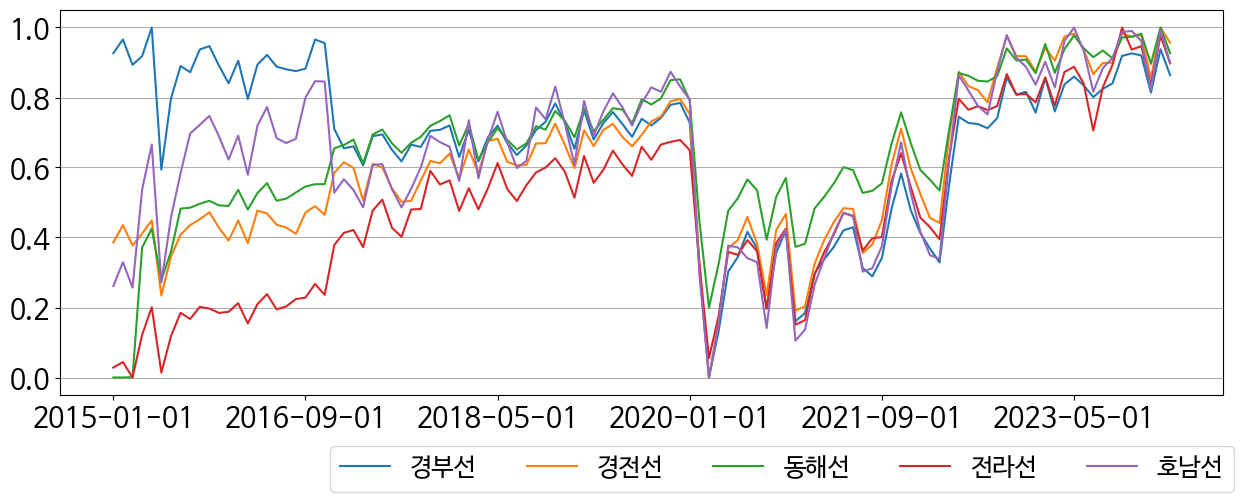

주말
Numerical Scaling... ( 2025-01-10 00:02:18.579960 )


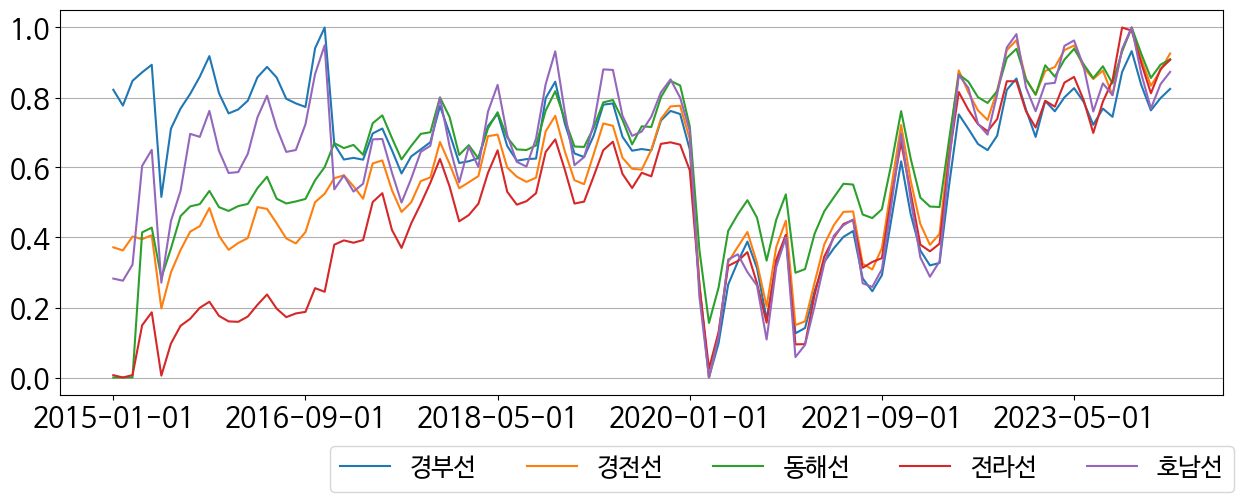

주중
Numerical Scaling... ( 2025-01-10 00:02:18.826942 )


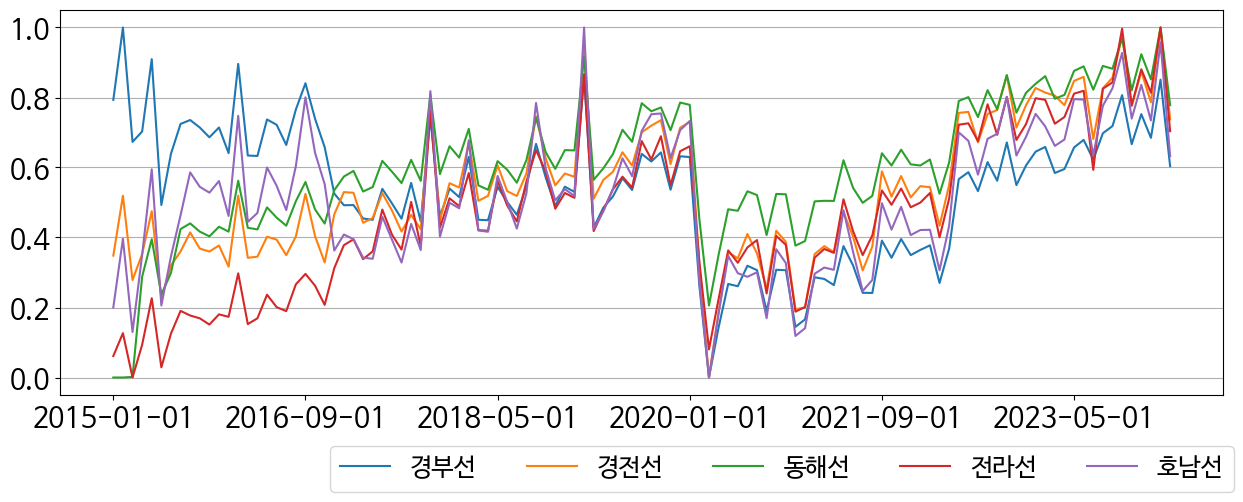

In [5]:
df_time = df.groupby(['전체주중주말', '주운행선', '운행년월'])['승차인원수'].sum().unstack(level=1).reset_index()

for period in df_time['전체주중주말'].unique():
    print(period)
    df_sub = df_time[df_time['전체주중주말'] == period]
    df_sub.set_index('운행년월', inplace=True)
    df_sub = df_sub.loc[df_sub.index <= '2024-03-01'].iloc[:,1:]
    plot_timeseries_dforigin(df_sub, scaled=True, figsize=(15,5), xlabel='', legend_colnum=5, save_local=False)